In [28]:
import praw
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
reddit = praw.Reddit(client_id= 'qXrfeqBZifMmtA',
                     client_secret= 'onlCFNaNySrpxg_NVJbmEzsYGuU' ,
                    username = 'EdwardVayne',
                    password = '052507',
                    user_agent='edv')

In [4]:
nba = reddit.subreddit('nba')
nfl = reddit.subreddit('nfl')
soccer = reddit.subreddit('soccer')

In [21]:
def getdata(sub, name):
    #retrieve top 1000 posts:
    posts = sub.top(limit=1000)
    data = [(_.title, _.created_utc, _.score, _.num_comments, _.link_flair_text, name) for _ in posts]
    return data

In [22]:
nba_data = getdata(nba, 'NBA')
nfl_data = getdata(nfl, 'NFL')
soc_data = getdata(soccer, 'Soccer')

In [23]:
nbadf = pd.DataFrame(nba_data, columns=['title', 'dateUTC', 'upvotes', 'comments', 'flair', 'subreddit'])
nfldf = pd.DataFrame(nfl_data, columns=['title', 'dateUTC', 'upvotes', 'comments', 'flair', 'subreddit'])
socdf = pd.DataFrame(soc_data, columns=['title', 'dateUTC', 'upvotes', 'comments', 'flair', 'subreddit'])
df = nbadf.append(nfldf)
df = df.append(socdf)
df.groupby('subreddit').agg({'title':'count'})

,title
subreddit,
NBA,995
NFL,996
Soccer,998


In [24]:
df.shape

(2989, 6)

In [25]:
df.head()

,title,dateUTC,upvotes,comments,flair,subreddit
0,[Withers] LeBron signing with Lakers.,1.530490e+09,53336,9524,"4 years, $154 million",NBA
1,LBJ throws it off the backboard to himself,1.528334e+09,47881,2293,LeBron James,NBA
2,Derrick Rose is reduced to tears after his tea...,1.541040e+09,45961,2490,Highlights,NBA
3,Is Lebron DENNIS systeming the cavs?,1.517529e+09,40415,919,sp,NBA
4,LeBron James passes to himself and dunks,1.497063e+09,39502,2328,Highlights,NBA


In [27]:
for i in df.iloc[0,:]:
    print(type(i))

<class 'str'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>


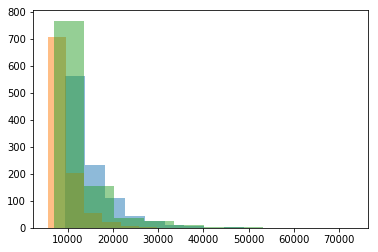

In [30]:
plt.hist(df[df.subreddit == 'NBA']['upvotes'], alpha=.5)
plt.hist(df[df.subreddit == 'NFL']['upvotes'], alpha=.5)
plt.hist(df[df.subreddit == 'Soccer']['upvotes'], alpha=.5)
plt.show()

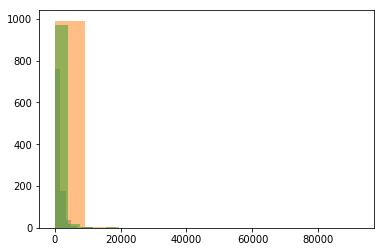

In [33]:
plt.hist(df[df.subreddit == 'NBA']['comments'], alpha=.5)
plt.hist(df[df.subreddit == 'NFL']['comments'], alpha=.5)
plt.hist(df[df.subreddit == 'Soccer']['comments'], alpha=.5)
plt.show()

In [51]:
#Most common threads by sport:
display(df[df.subreddit=='NBA'].groupby(['flair'])['comments'].agg('count').sort_values(ascending=False)[:5])
display(df[df.subreddit=='NFL'].groupby(['flair'])['comments'].agg('count').sort_values(ascending=False)[:5])
display(df[df.subreddit=='Soccer'].groupby(['flair'])['comments'].agg('count').sort_values(ascending=False)[:5])

flair
Highlights          363
National Writer      38
Post Game Thread     23
sp                   22
Beat Writer          18
Name: comments, dtype: int64

flair
Highlights       83
Breaking News    55
Roster Move      52
Rumor            46
Serious          22
Name: comments, dtype: int64

flair
Media                 426
Verified account       98
Official source        97
Unverified account     30
Mirror in comments     11
Name: comments, dtype: int64

In [ ]:
#which flairs get most engagement